# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [18]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [20]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Current google-chrome version is 109.0.5414
Get LATEST chromedriver version for 109.0.5414 google-chrome
Driver [C:\Users\joshu\.wdm\drivers\chromedriver\win32\109.0.5414.74\chromedriver.exe] found in cache


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [21]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url="https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [22]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = soup(html, "html.parser")

In [23]:
# Extract all rows of data
mars_headers = mars_soup.find_all("th")
mars_temp_data = mars_soup.find_all("tr", class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [24]:
# Create an empty list
mars_data_rows = []
# Loop through the scraped data to create a list of rows

for row in mars_temp_data:
    td = row.find_all("td")
    row_text = [col.text for col in td]
    
    mars_data_rows.append(row_text)
    
print(mars_data_rows)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [25]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df= pd.DataFrame(mars_data_rows, columns = ["id", "terresterial_date", "sol", "ls", "month", "min_temp", "pressure"])
mars_df

,id,terresterial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [26]:
# Confirm DataFrame was created successfully


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [27]:
# Examine data type of each column
mars_df.dtypes

id                   object
terresterial_date    object
sol                  object
ls                   object
month                object
min_temp             object
pressure             object
dtype: object

In [28]:
# Change data types for data analysis
mars_df["id"] = mars_df["id"].astype("object")
mars_df["sol"] = mars_df["sol"].astype("int")
mars_df["ls"] = mars_df["ls"].astype("int")
mars_df["month"] = mars_df["month"].astype("int")
mars_df["min_temp"] = mars_df["min_temp"].astype("float")
mars_df["pressure"] = mars_df["pressure"].astype("float")


In [30]:
#changing to datetime for terrestrial_date

mars_df["terresterial_date"] = pd.to_datetime(mars_df["terresterial_date"])

In [31]:
mars_df.dtypes

id                           object
terresterial_date    datetime64[ns]
sol                           int32
ls                            int32
month                         int32
min_temp                    float64
pressure                    float64
dtype: object

In [16]:
# Confirm type changes were successful by examining data types again


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [38]:
#unique values within month column

mars_df["month"].unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

In [39]:
#I did the number (n) of unique values, so 12 months. Even though google says 24 :)

mars_df["month"].nunique()

12

In [21]:
# 1. How many months are there on Mars?


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [34]:
# 2. How many Martian days' worth of data are there?
len(mars_df.index)

1867

In [41]:
# avg low temp by month

temp_by_month = mars_df.groupby(["month"]).mean()["min_temp"]
temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [25]:
# 3. What is the average low temperature by month?


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


Text(0, 0.5, 'Temperature in Celsius')

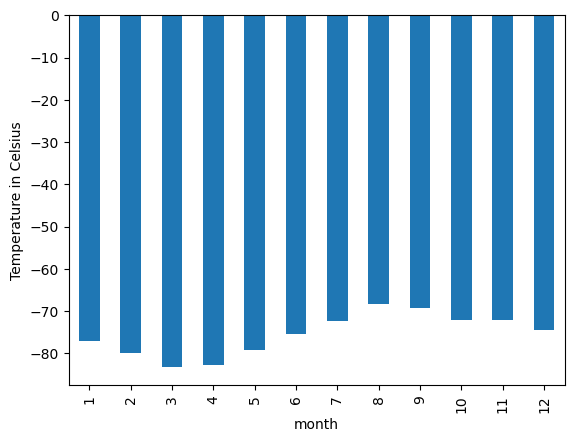

In [48]:
# Plot the average temperature by month
temp_by_month.plot.bar(x="month", y="min_temp")

plt.xlabel("month")
plt.ylabel("Temperature in Celsius")

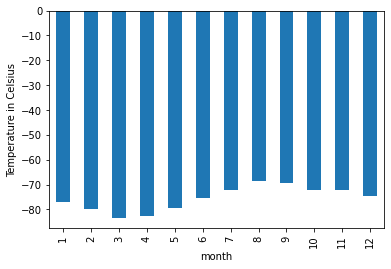

In [26]:
# Plot the average temperature by month
# done above to keep this as guide.. 

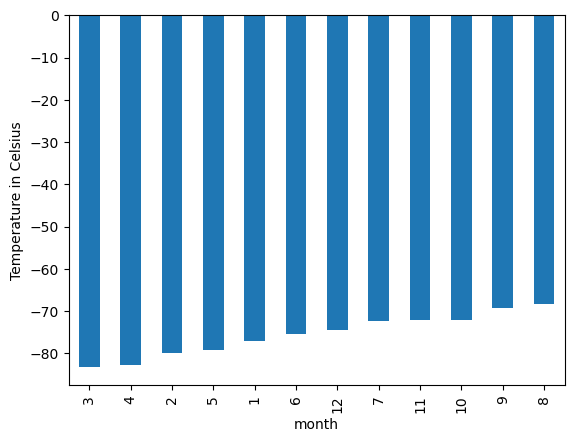

In [64]:
# Identify the coldest and hottest months in Curiosity's location

temp_by_month.sort_values().plot(kind="bar")
plt.ylabel("Temperature in Celsius")

plt.show()

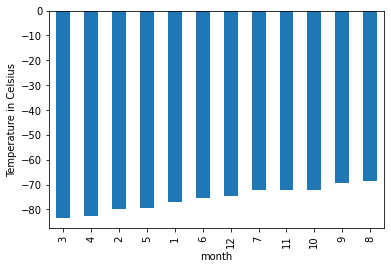

In [28]:
# Identify the coldest and hottest months in Curiosity's location
# EXAMPLE kept it in for reference 

In [49]:
# 4. Average pressure by Martian month
avg_pressure_by_month = mars_df.groupby(["month"]).mean()["pressure"]
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0, 0.5, 'Atmospheric Pressure')

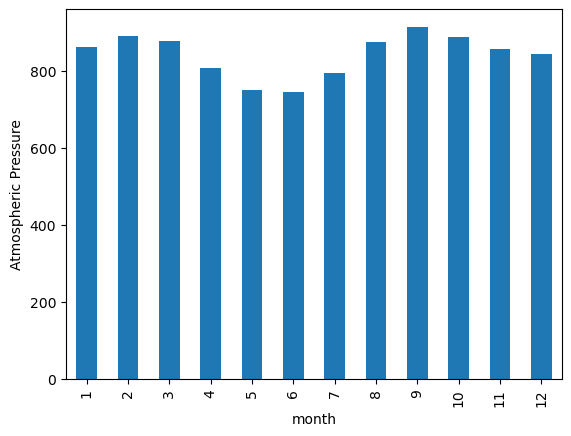

In [50]:
# Plot the average pressure by month
avg_pressure_by_month.plot.bar(x="month", y="pressure")

plt.xlabel("month")
plt.ylabel("Atmospheric Pressure")

#ANSWERS
#Lowest avg pressure is in June
#Highest average pressure is in September. 

In [61]:
# 5. How many terrestrial (earth) days are there in a Martian year?

#setting up the variable here for terrestrial days in the mars year......

terrestrial_days_in_mars_year = mars_df.groupby(["sol"]).mean()["min_temp"]

terrestrial_days_in_mars_year

sol
10     -75.0
11     -76.0
12     -76.0
13     -74.0
14     -74.0
        ... 
1973   -78.0
1974   -77.0
1975   -76.0
1976   -77.0
1977   -77.0
Name: min_temp, Length: 1867, dtype: float64

Text(0, 0.5, 'Minimum temperature')

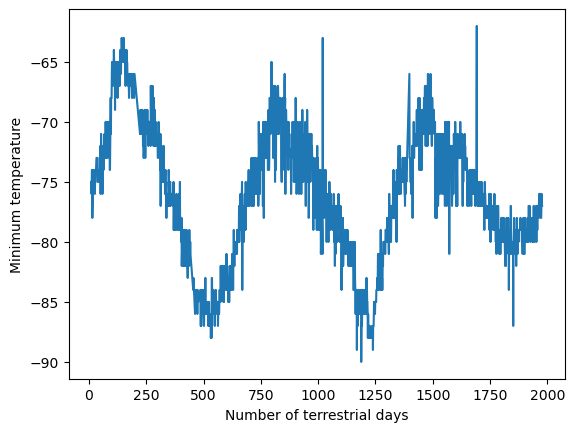

In [62]:
# 5. How many terrestrial (earth) days are there in a Martian year?

terrestrial_days_in_mars_year.plot(x="sol", y="min_temp")

plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum temperature")


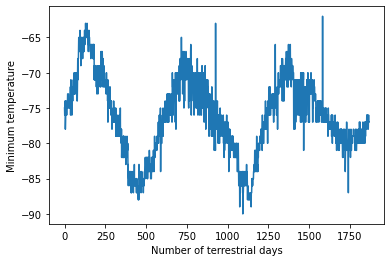

In [31]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#EXAMPLLLLLE

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [56]:
# Write the data to a CSV
mars_df.to_csv("mars_df.csv")

In [33]:
browser.quit()